In [1]:
import meep as mp
from meep import mpb
import math

num_bands = 8

k_points = [mp.Vector3(),
            mp.Vector3(0., 0.5),
            mp.Vector3(-1/3, 1/3),
            mp.Vector3()]

k_points = mp.interpolate(10, k_points)

geometry = [mp.Cylinder(0.25, material=mp.Medium(epsilon=12.96))]

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3)/2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3)/2, -0.5))

default_material = mp.Medium(epsilon=2.4)

resolution = 32

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

result = ms.run_tm()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0, 0.3181818181818182, 0.0>
  Vector3<0.0, 0.36363636363636365, 0.0>
  Vector3<0.0, 0.4090909090909091, 0.0>
  Vector3<0.0, 0.4545454545454546, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.0303030303030303, 0.48484848484848486, 0.0>
  Vector3<-0.0606060606060606, 0.46969696969696967, 0.0>
  Vector3<-0.0909090909090909, 0.45454545454545453, 0.0>
  Vector3<-0.1212121212121212, 0.4393939393939394, 0.0>
  Vector3<-0.1515151515151515, 0.4242424242424242, 0.0>
  Vector3<-0.1818181818181818, 0.40909090909090906, 0.0>
  Vector3<-0.2121212121212121, 0.3939393939393939, 0.0>
  Vector3<-0.2424242424242424, 0.3787878787878788, 0.0>
  Vector3<-

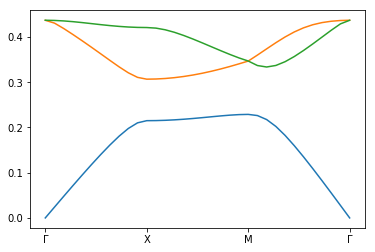

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def resolve_crossovers(frequencies, crossovers):
    freqs = np.copy(frequencies)
    for i in range(len(crossovers)):
        if crossovers[i] != 0:
            for co in crossovers[i]:
                temp = np.copy(freqs[co:, i+1])
                freqs[co:, i+1] = freqs[co:, i]
                freqs[co:, i] = temp
    return freqs

def plot_photonic_bands(frequencies, num_bands=4):
    points_in_between = (len(frequencies) - 4) / 3
    tick_locs = [i*points_in_between+i for i in range(4)]
    tick_labs = ['Γ', 'X', 'M', 'Γ']
    fig, ax = plt.subplots()

    ax.plot(frequencies[:, :num_bands])
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labs)

new_freqs = resolve_crossovers(ms.all_freqs, crossovers=[0, [23]])
plot_photonic_bands(new_freqs, num_bands=3)

In [3]:
ms.gap_list

[(29.075077099300145, 0.22878697388087121, 0.3066223040599163),
 (5.245062713047852, 0.43684934468726316, 0.4603794511991463),
 (0.22848388616677381, 0.6577746481135313, 0.659279276108018)]